# **Crime Forecasting using LSTM model**

# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 5.6MB/s 
     |████████████████████████████████| 2.1MB 22.9MB/s 
     |████████████████████████████████| 9.5MB 43.2MB/s 
  Found existing installation: Cython 0.29.22
    Uninstalling Cython-0.29.22:
      Successfully uninstalled Cython-0.29.22
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
from pmdarima.arima import ADFTest

# **Import Dataset**

In [4]:
!wget https://www.dropbox.com/s/s5f8dnrcaxij2py/data.csv?dl=0

--2021-03-29 21:52:29--  https://www.dropbox.com/s/s5f8dnrcaxij2py/data.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/s5f8dnrcaxij2py/data.csv [following]
--2021-03-29 21:52:29--  https://www.dropbox.com/s/raw/s5f8dnrcaxij2py/data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc36ba865fdfe1ed56343310d042.dl.dropboxusercontent.com/cd/0/inline/BLoEBSIuYAbXHNp2ZzQZvV3z5uUR50oEdUlt2C1hDR-0PBUtYPAdKmhdpt39VhdVAMd0ftG8G7yAVu-ykkD2lRjmG9JNTBkifL7K5Wt92LRLXUHI8Ha_YqklN-VzsegzjEXa2uunFa3Xhk1LqJq87TPz/file# [following]
--2021-03-29 21:52:30--  https://uc36ba865fdfe1ed56343310d042.dl.dropboxusercontent.com/cd/0/inline/BLoEBSIuYAbXHNp2ZzQZvV3z5uUR50oEdUlt2C1hDR-0PBUtYPAdKmhdpt39VhdVAMd0ftG8G7yAVu-ykkD2lRjmG9JNTB

In [5]:
crime_data = pd.read_csv('data.csv?dl=0')

In [6]:
crime_data.drop(['(Source)'],axis=1,inplace=True)

# **Data Preprocessing**

In [7]:
crime_data = crime_data.dropna()
crime_data[crime_data.duplicated(keep=False)]
crime_data = crime_data.reset_index(drop = True)
crime_data

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,HY416556,09/09/2010 08:10:00 PM,074XX S MARYLAND AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,323,6.0,11,1183191.0,1855830.0,2010,41.759594,-87.604169,"(41.759593809, -87.604169095)"
1,HY431076,01/15/2010 12:01:00 AM,044XX S OAKLEY AVE,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,True,False,924,12.0,02,1161779.0,1875003.0,2010,41.812678,-87.682112,"(41.812678317, -87.682111569)"
2,HS594517,11/01/2010 10:35:00 AM,029XX W WILCOX ST,2093,NARCOTICS,FOUND SUSPECT NARCOTICS,SIDEWALK,True,False,1124,2.0,18,1156795.0,1899213.0,2010,41.879216,-87.699738,"(41.87921551, -87.699737903)"
3,HY435598,06/01/2010 12:00:00 PM,005XX N MICHIGAN AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,SMALL RETAIL STORE,False,False,1834,42.0,11,1177342.0,1903838.0,2010,41.891466,-87.624153,"(41.891465732, -87.624153044)"
4,HS587770,10/28/2010 07:21:53 PM,008XX N AVERS AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),APARTMENT,True,False,1112,27.0,18,1150571.0,1905280.0,2010,41.895988,-87.722433,"(41.895987813, -87.722432928)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2687185,JD448774,12/10/2018 12:01:00 AM,107XX S RIDGEWAY AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,True,True,2211,19.0,17,1153258.0,1833037.0,2018,41.697690,-87.714474,"(41.697689632, -87.714474258)"
2687186,JB555242,12/16/2018 02:10:00 AM,041XX W 30TH ST,051A,ASSAULT,AGGRAVATED - HANDGUN,STREET,False,False,1031,22.0,04A,1149311.0,1884390.0,2018,41.838688,-87.727602,"(41.838687711, -87.727602064)"
2687187,JB269440,05/18/2018 11:34:00 PM,071XX S EUCLID AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,333,5.0,01A,1190280.0,1857899.0,2018,41.765103,-87.578122,"(41.765103492, -87.578121854)"
2687188,JB456068,09/29/2018 12:00:00 PM,042XX N MAJOR AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1624,38.0,05,1137586.0,1927566.0,2018,41.957387,-87.769587,"(41.957386868, -87.769586624)"


In [8]:
crime_data.columns = crime_data.columns.str.strip()
crime_data.columns = crime_data.columns.str.replace(',', '')
crime_data.columns = crime_data.columns.str.replace(' ', '_')
crime_data.columns = crime_data.columns.str.lower()

In [9]:
crime_data['date'] = pd.to_datetime(crime_data['date']).dt.date
crime_data

,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,ward,fbi_code,x_coordinate,y_coordinate,year,latitude,longitude,location
0,HY416556,2010-09-09,074XX S MARYLAND AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,323,6.0,11,1183191.0,1855830.0,2010,41.759594,-87.604169,"(41.759593809, -87.604169095)"
1,HY431076,2010-01-15,044XX S OAKLEY AVE,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,True,False,924,12.0,02,1161779.0,1875003.0,2010,41.812678,-87.682112,"(41.812678317, -87.682111569)"
2,HS594517,2010-11-01,029XX W WILCOX ST,2093,NARCOTICS,FOUND SUSPECT NARCOTICS,SIDEWALK,True,False,1124,2.0,18,1156795.0,1899213.0,2010,41.879216,-87.699738,"(41.87921551, -87.699737903)"
3,HY435598,2010-06-01,005XX N MICHIGAN AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,SMALL RETAIL STORE,False,False,1834,42.0,11,1177342.0,1903838.0,2010,41.891466,-87.624153,"(41.891465732, -87.624153044)"
4,HS587770,2010-10-28,008XX N AVERS AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),APARTMENT,True,False,1112,27.0,18,1150571.0,1905280.0,2010,41.895988,-87.722433,"(41.895987813, -87.722432928)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2687185,JD448774,2018-12-10,107XX S RIDGEWAY AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,True,True,2211,19.0,17,1153258.0,1833037.0,2018,41.697690,-87.714474,"(41.697689632, -87.714474258)"
2687186,JB555242,2018-12-16,041XX W 30TH ST,051A,ASSAULT,AGGRAVATED - HANDGUN,STREET,False,False,1031,22.0,04A,1149311.0,1884390.0,2018,41.838688,-87.727602,"(41.838687711, -87.727602064)"
2687187,JB269440,2018-05-18,071XX S EUCLID AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,333,5.0,01A,1190280.0,1857899.0,2018,41.765103,-87.578122,"(41.765103492, -87.578121854)"
2687188,JB456068,2018-09-29,042XX N MAJOR AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1624,38.0,05,1137586.0,1927566.0,2018,41.957387,-87.769587,"(41.957386868, -87.769586624)"


In [10]:
crime_data = crime_data.drop(['case_number','block','iucr','description','beat','ward','fbi_code','x_coordinate','y_coordinate','latitude','longitude'],axis=1)

In [11]:
crime_data = crime_data.reset_index(drop = True)
crime_data

,date,primary_type,location_description,arrest,domestic,year,location
0,2010-09-09,DECEPTIVE PRACTICE,RESIDENCE,False,False,2010,"(41.759593809, -87.604169095)"
1,2010-01-15,OFFENSE INVOLVING CHILDREN,RESIDENCE,True,False,2010,"(41.812678317, -87.682111569)"
2,2010-11-01,NARCOTICS,SIDEWALK,True,False,2010,"(41.87921551, -87.699737903)"
3,2010-06-01,DECEPTIVE PRACTICE,SMALL RETAIL STORE,False,False,2010,"(41.891465732, -87.624153044)"
4,2010-10-28,NARCOTICS,APARTMENT,True,False,2010,"(41.895987813, -87.722432928)"
...,...,...,...,...,...,...,...
2687185,2018-12-10,OFFENSE INVOLVING CHILDREN,RESIDENCE,True,True,2018,"(41.697689632, -87.714474258)"
2687186,2018-12-16,ASSAULT,STREET,False,False,2018,"(41.838687711, -87.727602064)"
2687187,2018-05-18,HOMICIDE,STREET,True,False,2018,"(41.765103492, -87.578121854)"
2687188,2018-09-29,BURGLARY,RESIDENCE,True,False,2018,"(41.957386868, -87.769586624)"


In [12]:
primary_type_map = {
    ('BURGLARY','MOTOR VEHICLE THEFT','THEFT','ROBBERY','BATTERY','ASSAULT','NON-CRIMINAL','NON-CRIMINAL (SUBJECT SPECIFIED)','CRIM SEXUAL ASSAULT','SEX OFFENSE','STALKING','PROSTITUTION',
     'WEAPONS VIOLATION','CONCEALED CARRY LICENSE VIOLATION','HOMICIDE','CRIMINAL DAMAGE','DECEPTIVE PRACTICE','CRIMINAL TRESPASS','KIDNAPPING','HUMAN TRAFFICKING','OFFENSE INVOLVING CHILDREN',
     'NARCOTICS','OTHER NARCOTIC VIOLATION','OTHER OFFENSE','ARSON','GAMBLING','PUBLIC PEACE VIOLATION','INTIMIDATION','INTERFERENCE WITH PUBLIC OFFICER','LIQUOR LAW VIOLATION','OBSCENITY','PUBLIC INDECENCY') : 'CRIME'
}
primary_type_mapping = {}
for keys, values in primary_type_map.items():
    for key in keys:
        primary_type_mapping[key] = values
crime_data['crimes'] = crime_data.primary_type.map(primary_type_mapping)

In [13]:
loc_map = {
    ('RESIDENCE', 'APARTMENT', 'CHA APARTMENT', 'RESIDENCE PORCH/HALLWAY', 'RESIDENCE-GARAGE',
    'RESIDENTIAL YARD (FRONT/BACK)', 'DRIVEWAY - RESIDENTIAL', 'HOUSE') : 'RESIDENCE',
    
    ('BARBERSHOP', 'COMMERCIAL / BUSINESS OFFICE', 'CURRENCY EXCHANGE', 'DEPARTMENT STORE', 'RESTAURANT',
    'ATHLETIC CLUB', 'TAVERN/LIQUOR STORE', 'SMALL RETAIL STORE', 'HOTEL/MOTEL', 'GAS STATION',
    'AUTO / BOAT / RV DEALERSHIP', 'CONVENIENCE STORE', 'BANK', 'BAR OR TAVERN', 'DRUG STORE',
    'GROCERY FOOD STORE', 'CAR WASH', 'SPORTS ARENA/STADIUM', 'DAY CARE CENTER', 'MOVIE HOUSE/THEATER',
    'APPLIANCE STORE', 'CLEANING STORE', 'PAWN SHOP', 'FACTORY/MANUFACTURING BUILDING', 'ANIMAL HOSPITAL',
    'BOWLING ALLEY', 'SAVINGS AND LOAN', 'CREDIT UNION', 'KENNEL', 'GARAGE/AUTO REPAIR', 'LIQUOR STORE',
    'GAS STATION DRIVE/PROP.', 'OFFICE', 'BARBER SHOP/BEAUTY SALON') : 'BUSINESS',
    
    ('VEHICLE NON-COMMERCIAL', 'AUTO', 'VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)', 'TAXICAB',
    'VEHICLE-COMMERCIAL', 'VEHICLE - DELIVERY TRUCK', 'VEHICLE-COMMERCIAL - TROLLEY BUS',
    'VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS') : 'VEHICLE',
    
    ('AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA', 'CTA PLATFORM', 'CTA STATION', 'CTA BUS STOP',
    'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA', 'CTA TRAIN', 'CTA BUS', 'CTA GARAGE / OTHER PROPERTY',
    'OTHER RAILROAD PROP / TRAIN DEPOT', 'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA',
    'AIRPORT BUILDING NON-TERMINAL - SECURE AREA', 'AIRPORT EXTERIOR - NON-SECURE AREA', 'AIRCRAFT',
    'AIRPORT PARKING LOT', 'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA', 'OTHER COMMERCIAL TRANSPORTATION',
    'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA', 'AIRPORT VENDING ESTABLISHMENT',
    'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA', 'AIRPORT EXTERIOR - SECURE AREA', 'AIRPORT TRANSPORTATION SYSTEM (ATS)',
    'CTA TRACKS - RIGHT OF WAY', 'AIRPORT/AIRCRAFT', 'BOAT/WATERCRAFT', 'CTA PROPERTY', 'CTA "L" PLATFORM',
    'RAILROAD PROPERTY') : 'PUBLIC_TRANSPORTATION',
    
    ('HOSPITAL BUILDING/GROUNDS', 'NURSING HOME/RETIREMENT HOME', 'SCHOOL, PUBLIC, BUILDING',
    'CHURCH/SYNAGOGUE/PLACE OF WORSHIP', 'SCHOOL, PUBLIC, GROUNDS', 'SCHOOL, PRIVATE, BUILDING',
    'MEDICAL/DENTAL OFFICE', 'LIBRARY', 'COLLEGE/UNIVERSITY RESIDENCE HALL', 'YMCA', 'HOSPITAL') : 'PUBLIC_BUILDING',
    
    ('STREET', 'PARKING LOT/GARAGE(NON.RESID.)', 'SIDEWALK', 'PARK PROPERTY', 'ALLEY', 'CEMETARY',
    'CHA HALLWAY/STAIRWELL/ELEVATOR', 'CHA PARKING LOT/GROUNDS', 'COLLEGE/UNIVERSITY GROUNDS', 'BRIDGE',
    'SCHOOL, PRIVATE, GROUNDS', 'FOREST PRESERVE', 'LAKEFRONT/WATERFRONT/RIVERBANK', 'PARKING LOT', 'DRIVEWAY',
    'HALLWAY', 'YARD', 'CHA GROUNDS', 'RIVER BANK', 'STAIRWELL', 'CHA PARKING LOT') : 'PUBLIC_AREA',
    
    ('POLICE FACILITY/VEH PARKING LOT', 'GOVERNMENT BUILDING/PROPERTY', 'FEDERAL BUILDING', 'JAIL / LOCK-UP FACILITY',
    'FIRE STATION', 'GOVERNMENT BUILDING') : 'GOVERNMENT',
    
    ('OTHER', 'ABANDONED BUILDING', 'WAREHOUSE', 'ATM (AUTOMATIC TELLER MACHINE)', 'VACANT LOT/LAND',
    'CONSTRUCTION SITE', 'POOL ROOM', 'NEWSSTAND', 'HIGHWAY/EXPRESSWAY', 'COIN OPERATED MACHINE', 'HORSE STABLE',
    'FARM', 'GARAGE', 'WOODED AREA', 'GANGWAY', 'TRAILER', 'BASEMENT', 'CHA PLAY LOT') : 'OTHER' 
}

loc_mapping = {}
for keys, values in loc_map.items():
    for key in keys:
        loc_mapping[key] = values
crime_data['location_type'] = crime_data.location_description.map(loc_mapping)

In [14]:
crime_data

,date,primary_type,location_description,arrest,domestic,year,location,crimes,location_type
0,2010-09-09,DECEPTIVE PRACTICE,RESIDENCE,False,False,2010,"(41.759593809, -87.604169095)",CRIME,RESIDENCE
1,2010-01-15,OFFENSE INVOLVING CHILDREN,RESIDENCE,True,False,2010,"(41.812678317, -87.682111569)",CRIME,RESIDENCE
2,2010-11-01,NARCOTICS,SIDEWALK,True,False,2010,"(41.87921551, -87.699737903)",CRIME,PUBLIC_AREA
3,2010-06-01,DECEPTIVE PRACTICE,SMALL RETAIL STORE,False,False,2010,"(41.891465732, -87.624153044)",CRIME,BUSINESS
4,2010-10-28,NARCOTICS,APARTMENT,True,False,2010,"(41.895987813, -87.722432928)",CRIME,RESIDENCE
...,...,...,...,...,...,...,...,...,...
2687185,2018-12-10,OFFENSE INVOLVING CHILDREN,RESIDENCE,True,True,2018,"(41.697689632, -87.714474258)",CRIME,RESIDENCE
2687186,2018-12-16,ASSAULT,STREET,False,False,2018,"(41.838687711, -87.727602064)",CRIME,PUBLIC_AREA
2687187,2018-05-18,HOMICIDE,STREET,True,False,2018,"(41.765103492, -87.578121854)",CRIME,PUBLIC_AREA
2687188,2018-09-29,BURGLARY,RESIDENCE,True,False,2018,"(41.957386868, -87.769586624)",CRIME,RESIDENCE


In [15]:
crime_data = crime_data.drop(['primary_type','location_description'],axis=1)

In [16]:
crime_data = crime_data.dropna()
crime_data[crime_data.duplicated(keep=False)]
crime_data = crime_data.reset_index(drop = True)

In [17]:
crime_data

,date,arrest,domestic,year,location,crimes,location_type
0,2010-09-09,False,False,2010,"(41.759593809, -87.604169095)",CRIME,RESIDENCE
1,2010-01-15,True,False,2010,"(41.812678317, -87.682111569)",CRIME,RESIDENCE
2,2010-11-01,True,False,2010,"(41.87921551, -87.699737903)",CRIME,PUBLIC_AREA
3,2010-06-01,False,False,2010,"(41.891465732, -87.624153044)",CRIME,BUSINESS
4,2010-10-28,True,False,2010,"(41.895987813, -87.722432928)",CRIME,RESIDENCE
...,...,...,...,...,...,...,...
2685660,2018-06-28,False,False,2018,"(41.972101049, -87.654899332)",CRIME,RESIDENCE
2685661,2018-12-10,True,True,2018,"(41.697689632, -87.714474258)",CRIME,RESIDENCE
2685662,2018-12-16,False,False,2018,"(41.838687711, -87.727602064)",CRIME,PUBLIC_AREA
2685663,2018-05-18,True,False,2018,"(41.765103492, -87.578121854)",CRIME,PUBLIC_AREA


# **1. Arrests - Forecast and Analysis**

In [18]:
crime_data1 = crime_data.groupby('arrest')
df1 = crime_data1.get_group(True)
df1

,date,arrest,domestic,year,location,crimes,location_type
1,2010-01-15,True,False,2010,"(41.812678317, -87.682111569)",CRIME,RESIDENCE
2,2010-11-01,True,False,2010,"(41.87921551, -87.699737903)",CRIME,PUBLIC_AREA
4,2010-10-28,True,False,2010,"(41.895987813, -87.722432928)",CRIME,RESIDENCE
5,2010-07-19,True,False,2010,"(41.881098841, -87.692951526)",CRIME,PUBLIC_AREA
6,2010-04-23,True,False,2010,"(41.786245702, -87.654669662)",CRIME,RESIDENCE
...,...,...,...,...,...,...,...
2685657,2018-11-27,True,False,2018,"(41.695982095, -87.596653142)",CRIME,BUSINESS
2685659,2018-09-10,True,False,2018,"(41.753600332, -87.562149651)",CRIME,RESIDENCE
2685661,2018-12-10,True,True,2018,"(41.697689632, -87.714474258)",CRIME,RESIDENCE
2685663,2018-05-18,True,False,2018,"(41.765103492, -87.578121854)",CRIME,PUBLIC_AREA


In [20]:
df1 = df1.drop(['domestic','year','location','crimes','location_type'],axis=1)

In [21]:
df1 = df1.groupby("date", as_index = False).count()

In [22]:
df1.set_index('date',inplace=True)

In [23]:
df1

,arrest
date,
2010-01-01,338
2010-01-02,232
2010-01-03,214
2010-01-04,225
2010-01-05,311
...,...
2018-12-27,115
2018-12-28,172
2018-12-29,151


In [24]:
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df1)

(0.01, False)

In [25]:
df1 = df1.astype('float32')
df1 = np.reshape(df1, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(df1)
train_size = int(len(df1) * 0.80)
test_size = len(df1) - train_size
train, test = df1[0:train_size,:], df1[train_size:len(df1),:]

def create_dataset(df1, look_back=1):
    X, Y = [], []
    for i in range(len(df1)-look_back-1):
        a = df1[i:(i+look_back), 0]
        X.append(a)
        Y.append(df1[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [26]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=20, batch_size=70, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

model.summary()

Epoch 1/20
38/38 [==============================] - 3s 18ms/step - loss: 0.1143 - val_loss: 0.0038
Epoch 2/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0172 - val_loss: 0.0034
Epoch 3/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0138 - val_loss: 0.0034
Epoch 4/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0134 - val_loss: 0.0033
Epoch 5/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0124 - val_loss: 0.0033
Epoch 6/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0117 - val_loss: 0.0033
Epoch 7/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0113 - val_loss: 0.0032
Epoch 8/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0110 - val_loss: 0.0032
Epoch 9/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0106 - val_loss: 0.0032
Epoch 10/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0100 - val_loss: 0.0032
Epoch 11/20
38/38 

In [28]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))

Train Mean Absolute Error: 22.342642923290754
Test Mean Absolute Error: 14.28537202287654


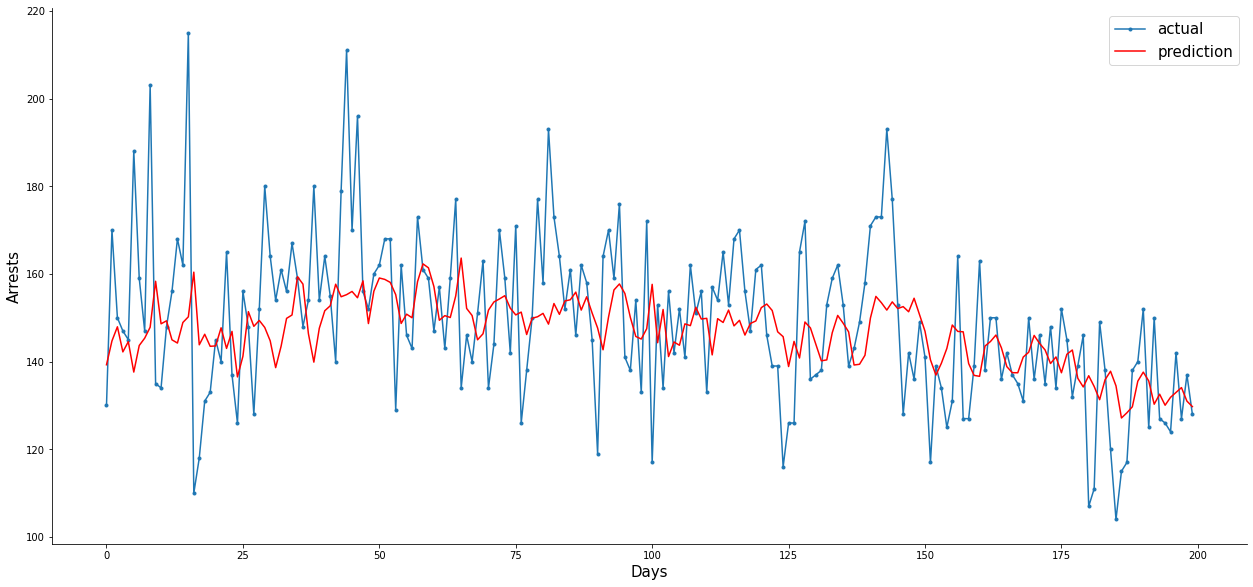

In [29]:
aa=[x for x in range(200)]
plt.figure(figsize=(18,8))
plt.plot(aa, Y_test[0][:200], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:200], 'r', label="prediction")
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Arrests', size=15)
plt.xlabel('Days', size=15)
plt.legend(fontsize=15)
plt.show();

# **2. Domestic - Forecast and Analysis**

In [30]:
crime_data2 = crime_data.groupby('domestic')
df2 = crime_data2.get_group(True)
df2

,date,arrest,domestic,year,location,crimes,location_type
22,2010-01-07,False,True,2010,"(41.811645148, -87.641970166)",CRIME,RESIDENCE
24,2010-08-15,True,True,2010,"(41.960027497, -87.720453904)",CRIME,RESIDENCE
50,2010-01-01,False,True,2010,"(41.96503178, -87.768375694)",CRIME,RESIDENCE
52,2010-12-05,False,True,2010,"(41.983591797, -87.713773009)",CRIME,RESIDENCE
55,2010-04-04,True,True,2010,"(41.782467577, -87.657125736)",CRIME,RESIDENCE
...,...,...,...,...,...,...,...
2685648,2018-04-01,True,True,2018,"(41.7829949, -87.741219775)",CRIME,RESIDENCE
2685649,2018-05-27,False,True,2018,"(41.814588508, -87.699311442)",CRIME,RESIDENCE
2685655,2018-07-17,True,True,2018,"(41.81126767, -87.691850144)",CRIME,RESIDENCE
2685658,2018-10-08,False,True,2018,"(41.700516252, -87.623332893)",CRIME,RESIDENCE


In [31]:
df2 = df2.drop(['arrest','year','location','crimes','location_type'],axis=1)

In [32]:
df2 = df2.groupby("date", as_index = False).count()

In [33]:
df2.set_index('date',inplace=True)

In [34]:
df2

,domestic
date,
2010-01-01,233
2010-01-02,121
2010-01-03,141
2010-01-04,119
2010-01-05,102
...,...
2018-12-27,94
2018-12-28,121
2018-12-29,119


In [35]:
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df2)

(0.01, False)

In [36]:
df2 = df2.astype('float32')
df2 = np.reshape(df2, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
df2 = scaler.fit_transform(df2)
train_size = int(len(df2) * 0.80)
test_size = len(df2) - train_size
train, test = df2[0:train_size,:], df2[train_size:len(df2),:]

def create_dataset(df2, look_back=1):
    X, Y = [], []
    for i in range(len(df2)-look_back-1):
        a = df2[i:(i+look_back), 0]
        X.append(a)
        Y.append(df2[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [37]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=20, batch_size=70, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

model.summary()

Epoch 1/20
38/38 [==============================] - 2s 16ms/step - loss: 0.0720 - val_loss: 0.0096
Epoch 2/20
38/38 [==============================] - 0s 4ms/step - loss: 0.0137 - val_loss: 0.0087
Epoch 3/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0124 - val_loss: 0.0080
Epoch 4/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0114 - val_loss: 0.0075
Epoch 5/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0109 - val_loss: 0.0072
Epoch 6/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0105 - val_loss: 0.0069
Epoch 7/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0099 - val_loss: 0.0067
Epoch 8/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0099 - val_loss: 0.0066
Epoch 9/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0097 - val_loss: 0.0065
Epoch 10/20
38/38 [==============================] - 0s 4ms/step - loss: 0.0096 - val_loss: 0.0065
Epoch 11/20
38/38 

In [39]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))

Train Mean Absolute Error: 12.865650764046686
Test Mean Absolute Error: 11.860252346087414


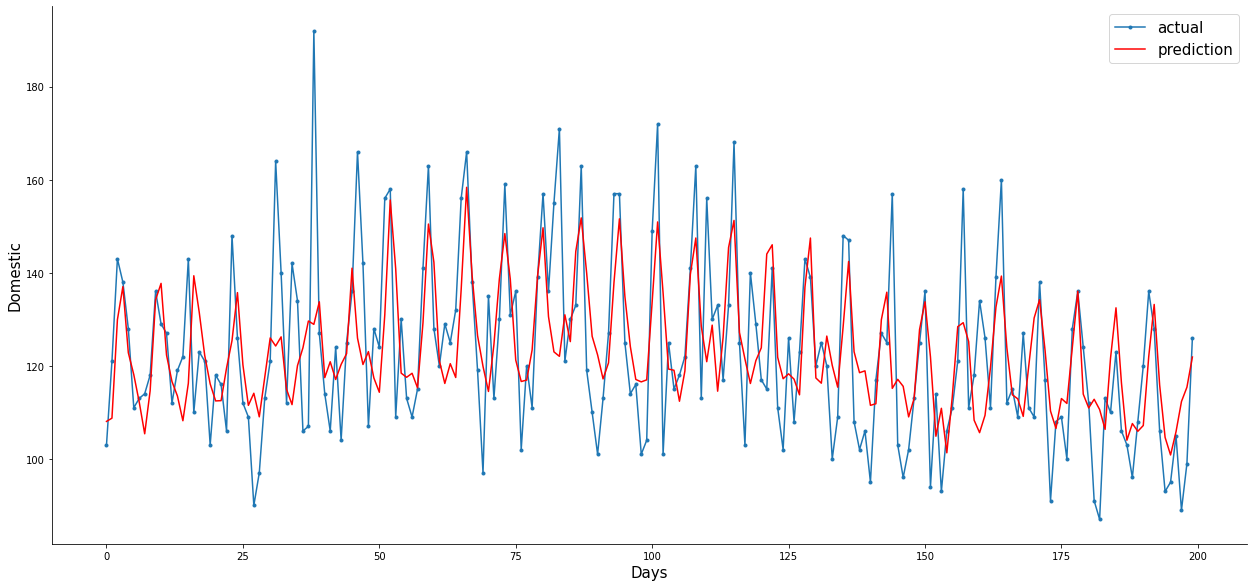

In [40]:
aa=[x for x in range(200)]
plt.figure(figsize=(18,8))
plt.plot(aa, Y_test[0][:200], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:200], 'r', label="prediction")
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Domestic', size=15)
plt.xlabel('Days', size=15)
plt.legend(fontsize=15)
plt.show();

# **3. Total Crime - Forecast and Analysis**

In [43]:
crime_data3 = crime_data.groupby('crimes')
df3 = crime_data3.get_group('CRIME')
df3

,date,arrest,domestic,year,location,crimes,location_type
0,2010-09-09,False,False,2010,"(41.759593809, -87.604169095)",CRIME,RESIDENCE
1,2010-01-15,True,False,2010,"(41.812678317, -87.682111569)",CRIME,RESIDENCE
2,2010-11-01,True,False,2010,"(41.87921551, -87.699737903)",CRIME,PUBLIC_AREA
3,2010-06-01,False,False,2010,"(41.891465732, -87.624153044)",CRIME,BUSINESS
4,2010-10-28,True,False,2010,"(41.895987813, -87.722432928)",CRIME,RESIDENCE
...,...,...,...,...,...,...,...
2685660,2018-06-28,False,False,2018,"(41.972101049, -87.654899332)",CRIME,RESIDENCE
2685661,2018-12-10,True,True,2018,"(41.697689632, -87.714474258)",CRIME,RESIDENCE
2685662,2018-12-16,False,False,2018,"(41.838687711, -87.727602064)",CRIME,PUBLIC_AREA
2685663,2018-05-18,True,False,2018,"(41.765103492, -87.578121854)",CRIME,PUBLIC_AREA


In [44]:
df3 = df3.drop(['domestic','year','arrest','location','location_type'],axis=1)

In [45]:
df3 = df3.groupby("date", as_index = False).count()

In [46]:
df3.set_index('date',inplace=True)

In [47]:
df3

,crimes
date,
2010-01-01,1355
2010-01-02,792
2010-01-03,759
2010-01-04,855
2010-01-05,910
...,...
2018-12-27,591
2018-12-28,694
2018-12-29,666


In [48]:
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df3)

(0.01, False)

In [49]:
df3 = df3.astype('float32')
df3 = np.reshape(df3, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
df3 = scaler.fit_transform(df3)
train_size = int(len(df3) * 0.80)
test_size = len(df3) - train_size
train, test = df3[0:train_size,:], df3[train_size:len(df3),:]

def create_dataset(df3, look_back=1):
    X, Y = [], []
    for i in range(len(df3)-look_back-1):
        a = df3[i:(i+look_back), 0]
        X.append(a)
        Y.append(df3[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [50]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=20, batch_size=70, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

model.summary()

Epoch 1/20
38/38 [==============================] - 2s 17ms/step - loss: 0.0919 - val_loss: 0.0043
Epoch 2/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0104 - val_loss: 0.0030
Epoch 3/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0080 - val_loss: 0.0029
Epoch 4/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0077 - val_loss: 0.0028
Epoch 5/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0079 - val_loss: 0.0028
Epoch 6/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0076 - val_loss: 0.0027
Epoch 7/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0076 - val_loss: 0.0027
Epoch 8/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0073 - val_loss: 0.0027
Epoch 9/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0070 - val_loss: 0.0026
Epoch 10/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0070 - val_loss: 0.0026
Epoch 11/20
38/38 

In [51]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))

Train Mean Absolute Error: 53.38488915164647
Test Mean Absolute Error: 42.34300517494848


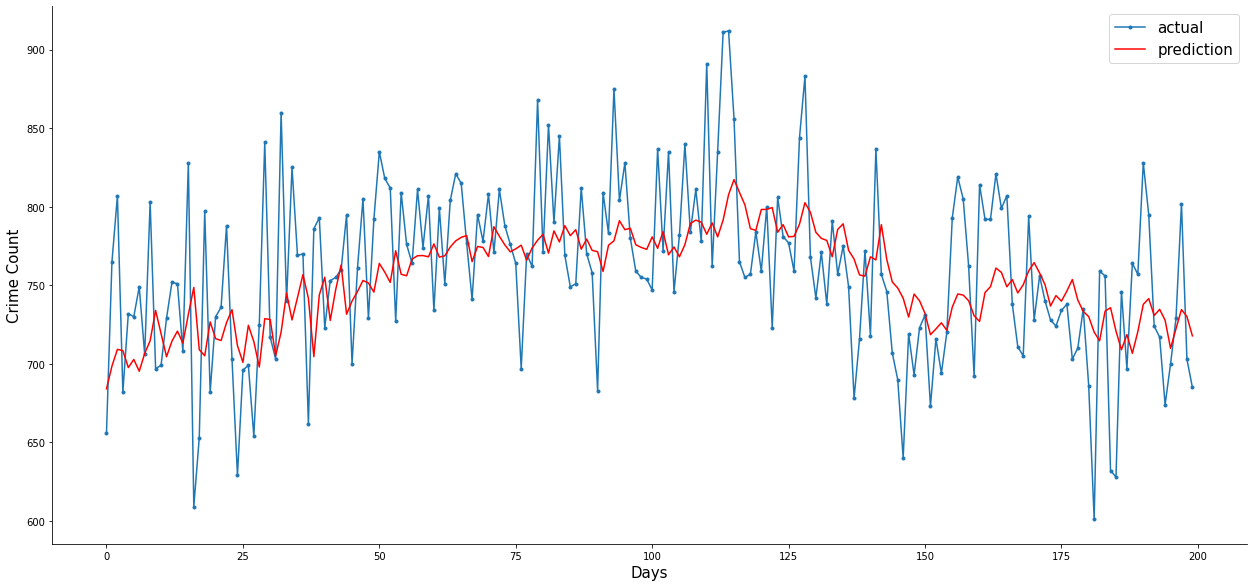

In [52]:
aa=[x for x in range(200)]
plt.figure(figsize=(18,8))
plt.plot(aa, Y_test[0][:200], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:200], 'r', label="prediction")
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Crime Count', size=15)
plt.xlabel('Days', size=15)
plt.legend(fontsize=15)
plt.show();